# β-Oxidação - Representação em Grafo

Grafo com as reações da β-Oxidação, destacando os principais metabólitos orgânicos envolvidos na oxidação de ácidos graxos para que eles possam ser utilizados, por exemplo, no metabolismo energético. As setas no grafo simbolizam essas reações, com as chaves do dicionário que define o grafo representando reagentes e seus valores, seus produtos. Além disso, foi utilizada uma estrutura de grafos ponderados para sinalizar as principais enzimas que catalisam cada reação.

Ao final desse notebook, é possível obter uma  representação visual do grafo apresentado, a partir do software `Graphviz` ou `Pygraphviz` [[http://pygraphviz.github.io/](http://pygraphviz.github.io/)]. 
_[Erros podem ocorrer nessa parte caso o software não esteja instalado corretamente na sua máquina, podendo obter a estrutura do grafo pelo site [https://dreampuf.github.io/GraphvizOnline/](https://dreampuf.github.io/GraphvizOnline/).]_

In [12]:
betaoxidacao = { 
    "ácido graxo": {
        "acil-CoA": {"label": "acil-CoA-sintetase"}
    },
    
    "acil-CoA": {
        "trans-Δ²-Enoil-CoA": {"label": "acil-CoA-desidrogenase"} 
    },
    
    "trans-Δ²-Enoil-CoA":{
        "beta-hidroxiacil-CoA": {"label": "enoil-CoA-hidratase"},
    },
    
    "beta-hidroxiacil-CoA": {
        "beta-cetoacil-CoA": {"label": "beta-hidroxiacilCoA-desidrogenase"},
    },
    
    "beta-cetoacil-CoA":{
        "acetil-CoA":{"label": "acil-CoA-acetiltransferase"},
        "acil-CoA":{"label": "acil-CoA-acetiltransferase"}
    }
    
}

Para que a representação visual seja impressa corretamente com os metaólitos e as enzimas, será necessário importar a biblioteca `networkx`, para conseguir criar e modular estruturas de grafos; a classe `AGraph` do sistema `Graphviz`, para estruturar a visualização dos grafos, e o módulo `IPython.display`, para exibir essa imagem diretamente no notebook e salvá-la em `.png`.

strict digraph "" {
	"ácido graxo" -> "acil-CoA"	[label="acil-CoA-sintetase"];
	"acil-CoA" -> "trans-Δ²-Enoil-CoA"	[label="acil-CoA-desidrogenase"];
	"trans-Δ²-Enoil-CoA" -> "beta-hidroxiacil-CoA"	[label="enoil-CoA-hidratase"];
	"beta-hidroxiacil-CoA" -> "beta-cetoacil-CoA"	[label="beta-hidroxiacilCoA-desidrogenase"];
	"beta-cetoacil-CoA" -> "acil-CoA"	[label="acil-CoA-acetiltransferase"];
	"beta-cetoacil-CoA" -> "acetil-CoA"	[label="acil-CoA-acetiltransferase"];
}



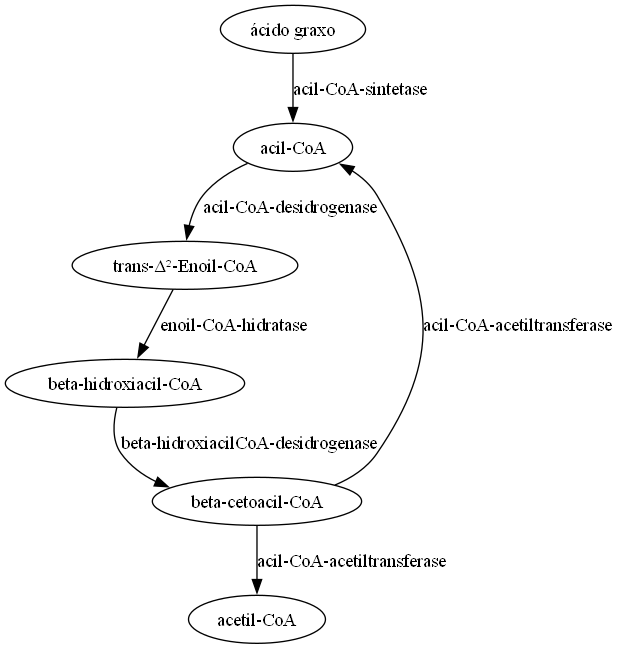

In [15]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

g = nx.DiGraph(betaoxidacao)
betaoxidacao = to_agraph(g)

print(betaoxidacao.to_string())

from IPython.display import Image, display

display(Image(betaoxidacao.draw(format="png", prog="dot")))
betaoxidacao.draw("betaoxidacao.png", format="png", prog="dot")